In [264]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import plotly.express as px
import matplotlib.pyplot as plt

In [265]:
data_path = '../data/'
files = os.listdir(data_path)

In [266]:
files

['toyota.xlsx', 'bmw.xlsx', 'audi.xlsx']

In [267]:
audi = pd.read_excel(data_path + files[2])
bmw = pd.read_excel(data_path + files[1])
toyota = pd.read_excel(data_path + files[0])

In [268]:
audi.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [269]:
bmw.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [270]:
toyota.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

## Cálculo de campo edad

In [271]:
audi['age'] = 2022 - audi['year']
bmw['age'] = 2022 - bmw['year']
toyota['age'] = 2022 - toyota['year']

In [272]:
interes = ['mileage', 'age']

In [273]:
from sklearn.linear_model import LinearRegression

In [274]:
def interpretaciones(coef):
    print(f'Por cada kilómetro, se pierden {abs(round(coef[0], 3))} dólares')
    print(f'Por cada año que pasa, se pierden {abs(round(coef[1], 3))} dólares')
    print('*' * 100)
    print(f'Se pierde $1 USD cada {abs(round(1/coef[0], 3))} kilómetros')
    print(f'Se pierde $1 USD cada {abs(round(1/coef[1], 5))} años o bien... {(abs(round(1/coef[1], 5)) * 365) * 24} horas')

# Audi

In [275]:
X = audi[interes].copy()
y = audi['price'].copy()

In [276]:
rl_s = LinearRegression()
rl_s.fit(X, y)

LinearRegression()

In [277]:
interpretaciones(rl_s.coef_)

Por cada kilómetro, se pierden 0.089 dólares
Por cada año que pasa, se pierden 2438.413 dólares
****************************************************************************************************
Se pierde $1 USD cada 11.203 kilómetros
Se pierde $1 USD cada 0.00041 años o bien... 3.5916 horas


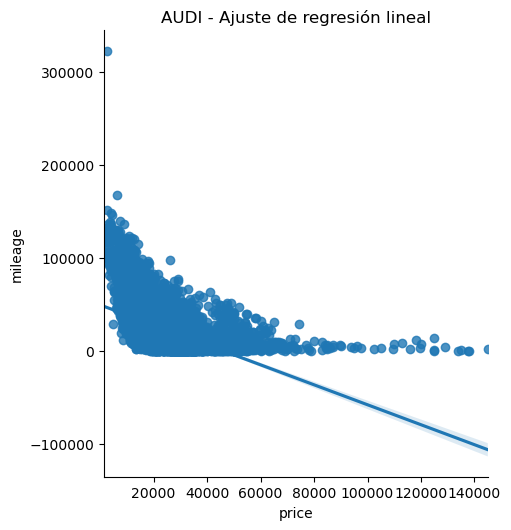

In [278]:
sns.lmplot(data = audi, x = 'price', y = interes[0], fit_reg = True).set(title='AUDI - Ajuste de regresión lineal')
plt.show()

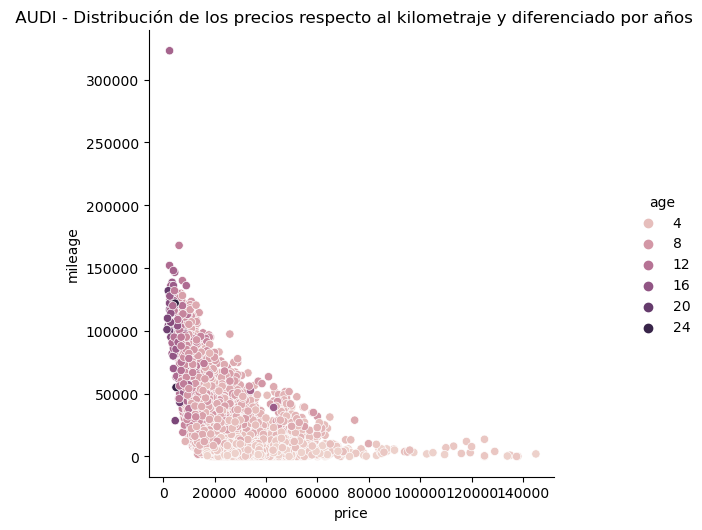

In [279]:
sns.relplot(data=audi, x='price', y=interes[0], hue = interes[1]).set(title=' AUDI - Distribución de los precios respecto al kilometraje y diferenciado por años')
plt.show()

In [280]:
prediccion = rl_s.predict(X)

In [281]:
audi['predicho'] = rl_s.predict(X)

In [282]:
audi['error'] = audi['price'] - audi['predicho']

In [283]:
audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,age,predicho,error
0,A1,2017.0,12500.0,Manual,15735.0,Petrol,150.0,55.4,1.4,5.0,23462.756625,-10962.756625
1,A6,2016.0,16500.0,Automatic,36203.0,Diesel,20.0,64.2,2.0,6.0,19197.403861,-2697.403861
2,A1,2016.0,11000.0,Manual,29946.0,Petrol,30.0,55.4,1.4,6.0,19755.893299,-8755.893299
3,A4,2017.0,16800.0,Automatic,25952.0,Diesel,145.0,67.3,2.0,5.0,22550.804157,-5750.804157
4,A3,2019.0,17300.0,Manual,1998.0,Petrol,145.0,49.6,1.0,3.0,29565.724543,-12265.724543


In [284]:
mediana = audi.error.median()
promedio = audi.error.mean()
sigma = audi.error.std()
print(f'Mediana del error: {mediana}\nMedia del error: {promedio}\nDesviación estándar del error: {sigma}')

Mediana del error: -2057.895969400395
Media del error: 4.019918839332313e-12
Desviación estándar del error: 9348.221287543813


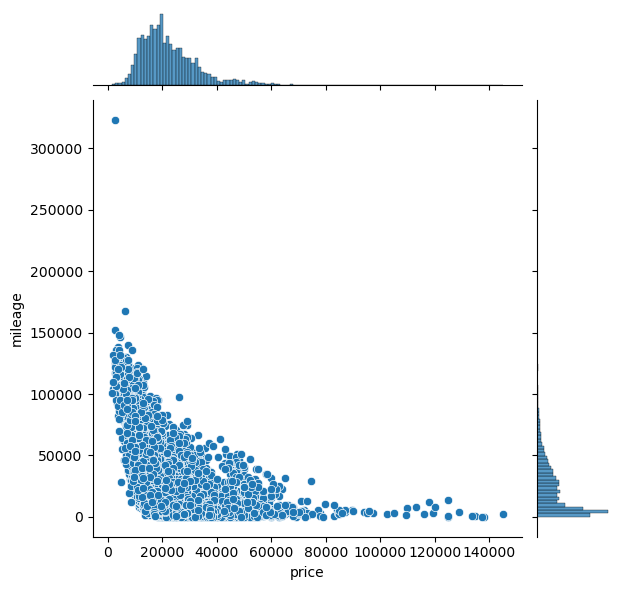

In [285]:
sns.jointplot(x=audi["price"], y=audi.mileage, kind='scatter')
plt.show()

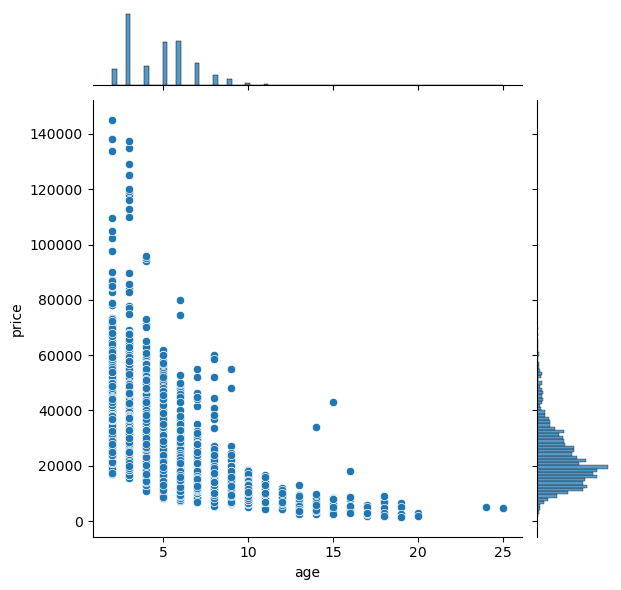

In [286]:
sns.jointplot(x=audi.age, y=audi.price, kind='scatter')
plt.show()

In [287]:
fig = px.histogram(audi, x='error', marginal='box')
fig.show()

# BMW

In [288]:
X = bmw[interes].copy()
y = bmw.price

In [289]:
rl_s = LinearRegression()
rl_s.fit(X, y)

LinearRegression()

In [290]:
interpretaciones(rl_s.coef_)

Por cada kilómetro, se pierden 0.139 dólares
Por cada año que pasa, se pierden 1880.92 dólares
****************************************************************************************************
Se pierde $1 USD cada 7.206 kilómetros
Se pierde $1 USD cada 0.00053 años o bien... 4.642799999999999 horas


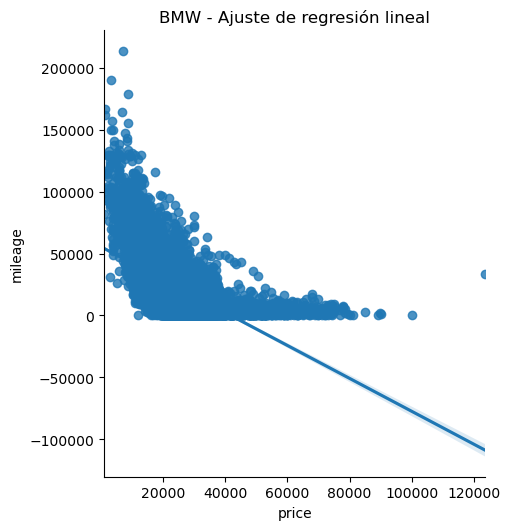

In [291]:
sns.lmplot(data=bmw, x = 'price', y = interes[0], fit_reg=True).set(title='BMW - Ajuste de regresión lineal')
plt.show()

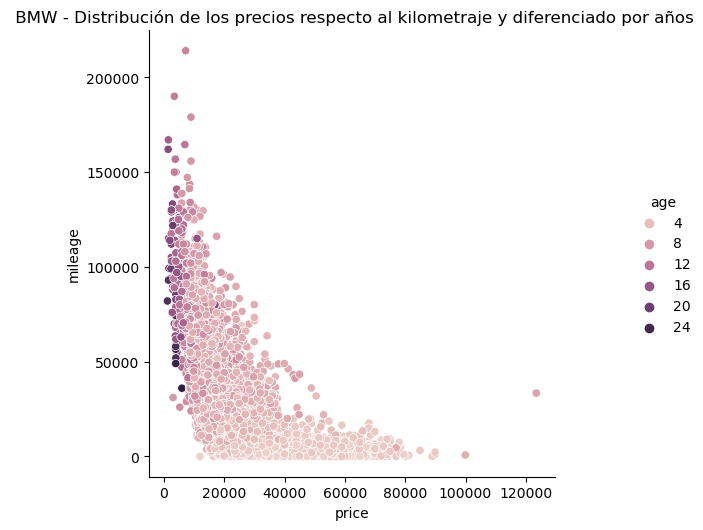

In [292]:
sns.relplot(data=bmw, x='price', y=interes[0], hue=interes[1]).set(title=' BMW - Distribución de los precios respecto al kilometraje y diferenciado por años')
plt.show()

In [293]:
prediccion = rl_s.predict(X)

In [294]:
bmw['predicho'] = rl_s.predict(X)

In [295]:
bmw['error'] = bmw.price - bmw.predicho

In [296]:
mediana = bmw.error.median()
promedio = bmw.error.mean()
sigma = bmw.error.std()
print(f'Mediana del error: {mediana}\nMedia del error: {promedio}\nDesviación estándar del error: {sigma}')

Mediana del error: -1893.9556627617894
Media del error: -2.8186658914420813e-12
Desviación estándar del error: 8645.125213092328


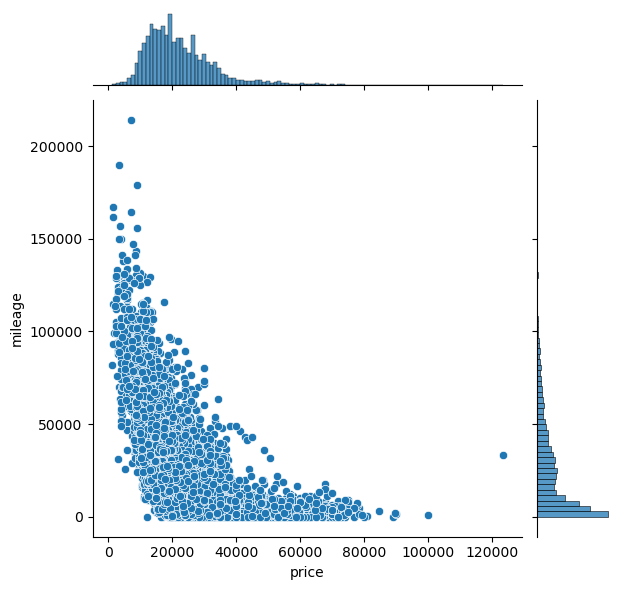

In [297]:
sns.jointplot(x=bmw["price"], y=bmw.mileage, kind='scatter')
plt.show()

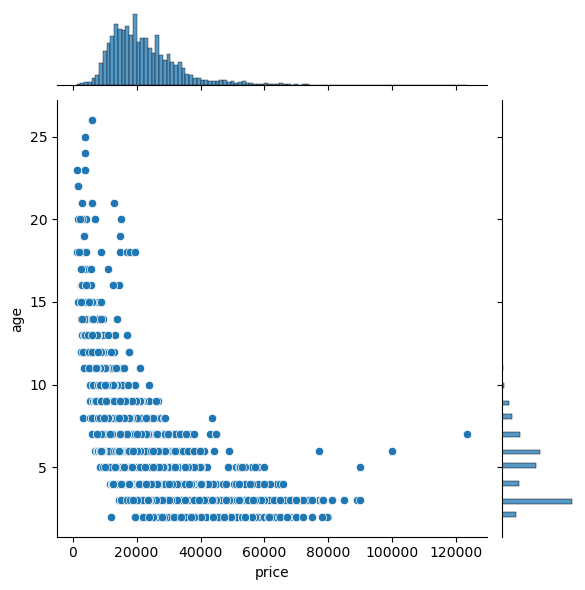

In [298]:
sns.jointplot(x=bmw["price"], y=bmw.age, kind='scatter')
plt.show()

In [299]:
fig = px.histogram(bmw, x='error', marginal='box')
fig.show()

# Toyota

In [300]:
X = toyota[interes].copy()
y = toyota.price.copy()

In [301]:
rl_s = LinearRegression()
rl_s.fit(X, y)

LinearRegression()

In [302]:
interpretaciones(rl_s.coef_)

Por cada kilómetro, se pierden 0.006 dólares
Por cada año que pasa, se pierden 1249.34 dólares
****************************************************************************************************
Se pierde $1 USD cada 168.449 kilómetros
Se pierde $1 USD cada 0.0008 años o bien... 7.008000000000001 horas


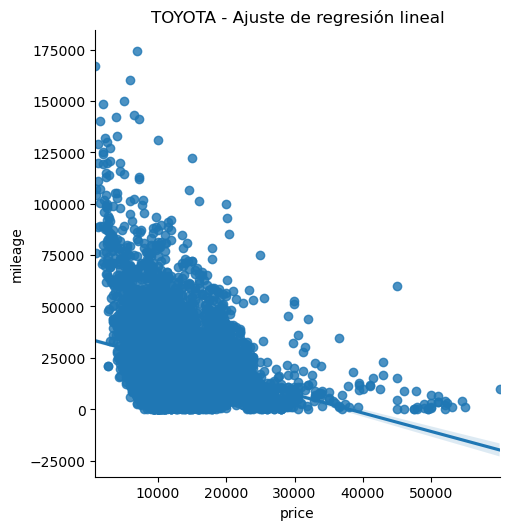

In [303]:
sns.lmplot(data=toyota, x = 'price', y = interes[0], fit_reg=True).set(title='TOYOTA - Ajuste de regresión lineal')
plt.show()

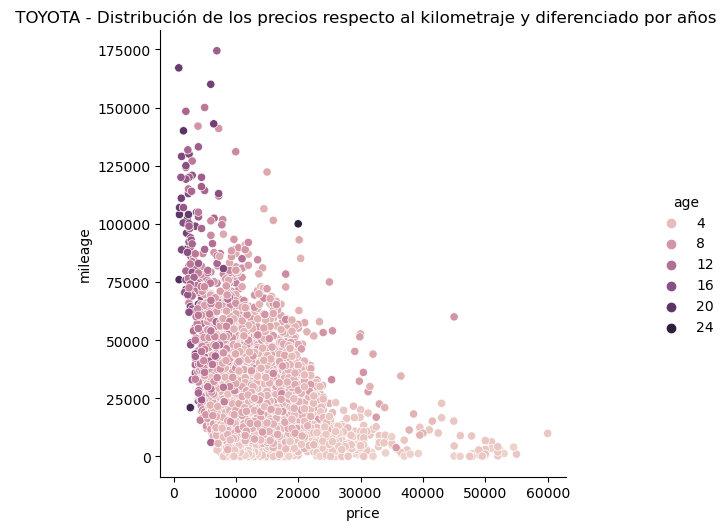

In [304]:
sns.relplot(data=toyota, x='price', y=interes[0], hue=interes[1]).set(title=' TOYOTA - Distribución de los precios respecto al kilometraje y diferenciado por años')
plt.show()

In [305]:
prediccion = rl_s.predict(X)
toyota['predicho'] = rl_s.predict(X)
toyota['error'] = toyota.price - toyota.predicho
mediana = toyota.error.median()
promedio = toyota.error.mean()
sigma = toyota.error.std()
print(f'Mediana del error: {mediana}\nMedia del error: {promedio}\nDesviación estándar del error: {sigma}')

Mediana del error: -1760.9517462021277
Media del error: 1.1284321322086198e-12
Desviación estándar del error: 5754.908429527072


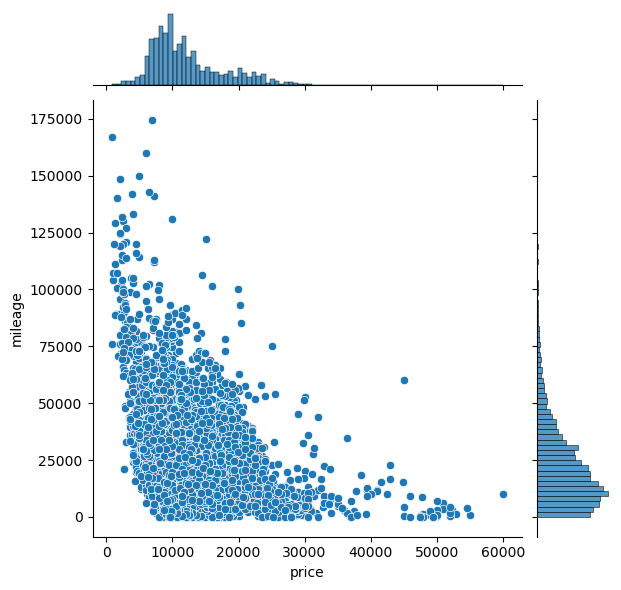

In [306]:
sns.jointplot(x=toyota["price"], y=toyota.mileage, kind='scatter')
plt.show()

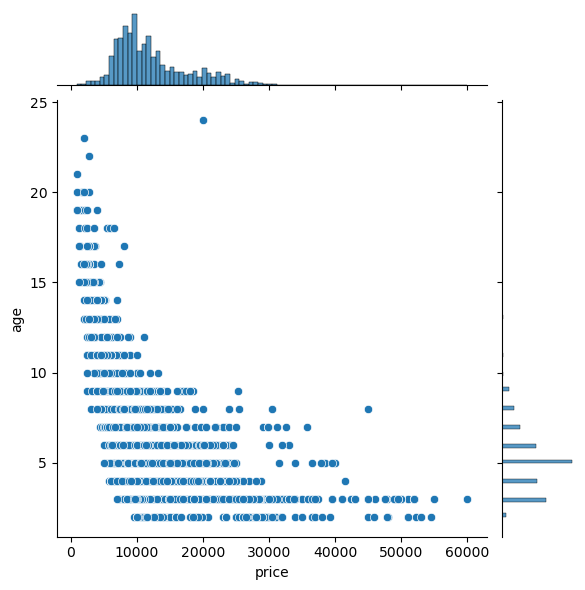

In [307]:
sns.jointplot(x=toyota["price"], y=toyota.age, kind='scatter')
plt.show()

In [308]:
fig = px.histogram(toyota, x='error', marginal='box')
fig.show()